<a href="https://colab.research.google.com/github/pa1kpuram/projects/blob/main/Business_Case_Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**

**Title:** Enhancing Micro-Mobility: Analyzing and Optimizing Demand for Yulu's Shared Electric Cycles in India

1. **Introduction**

    🛍️ Introduction to Yulu

    📈 Business Problem

    🎯 Objective of Analysis

    📊 Features of data

2. **Exploratory Data Analysis**
    
    2.1 Univariate Analysis

    2.2 Bivariate Analysis

3.  **Hypothesis Testing**

    3.1 Effect of Working Day on Number of Electric Cycles Rented

    3.2 Effect of Season on Number of Electric Cycles Rented

    3.3 Effect of Weather on Number of Electric Cycles Rented

    3.4 Dependency of Weather on Season
    
4. **Business Recommendations**

# **1.Introduction**

Yulu is a prominent micro-mobility service provider in India, dedicated to offering innovative solutions for daily commuting through shared electric cycles. Established with the mission to alleviate traffic congestion and provide a sustainable commuting option, Yulu has positioned its services strategically at various locations such as metro stations, bus stands, office spaces, residential areas, and corporate offices. This ensures that commuters can easily access electric cycles for their first and last-mile journeys.

# **Business Problem**

Recently, Yulu has faced a notable decline in revenues, prompting the need to better understand the demand dynamics for their shared electric cycles. To address this challenge, Yulu has engaged a consulting firm to conduct a thorough analysis of the factors influencing demand. The primary goal is to identify which variables significantly impact the usage of Yulu's electric cycles and to understand the extent of their influence. This analysis will provide Yulu with valuable insights to refine their operational strategies, optimize resource allocation, and implement targeted marketing efforts aimed at boosting ridership and revenue.

# **Objective of Analysis**

The objective of this analysis is to identify and evaluate the key factors affecting the demand for Yulu's shared electric cycles in the Indian market. Specifically, the analysis aims to:

1. Determine the significance of various variables (e.g., working days, weather conditions, seasons) in predicting the demand for electric cycles.
2. Assess how well these variables describe fluctuations in demand.
3. Provide actionable insights and recommendations based on the findings to help Yulu optimize operations, enhance resource allocation, and develop targeted marketing strategies to increase ridership and revenue.

# **Features of the Data**

| Feature     | Description                                                                                         |
|-------------|-----------------------------------------------------------------------------------------------------|
| datetime    | The date and time of the record                                                                     |
| season      | The season during which the record was taken (1: Spring, 2: Summer, 3: Fall, 4: Winter)             |
| holiday     | Indicator of whether the day is a holiday (0: Not a holiday, 1: Holiday)                            |
| workingday  | Indicator of whether the day is a working day (0: Non-working day, 1: Working day)                  |
| weather     | Weather conditions on the day (1: Clear, Few clouds, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds; 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog) |
| temp        | The actual temperature in Celsius                                                                   |
| atemp       | The "feels-like" temperature in Celsius, accounting for humidity and wind                           |
| humidity    | The humidity percentage                                                                             |
| windspeed   | The wind speed                                                                                      |
| casual      | The count of casual users (users who have not registered)                                           |
| registered  | The count of registered users                                                                       |
| count       | The total count of rental bikes, including both casual and registered users                         |

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [3]:
# Load the dataset
data = pd.read_csv('/content/bike_sharing.csv')

In [4]:
# Display the first few rows of the dataset
print(data.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [5]:
data.shape

(10886, 12)

In [ ]:
# Check the data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [ ]:
# Summary statistics
print(data.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

# **2. Exploratory Data Analysis (EDA)**

## **2.1 Univariate Analysis**

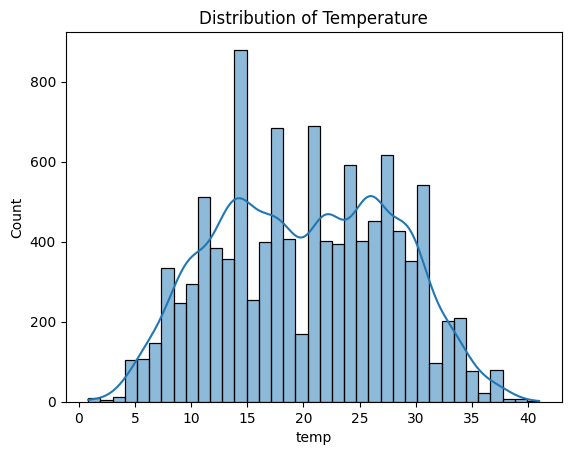

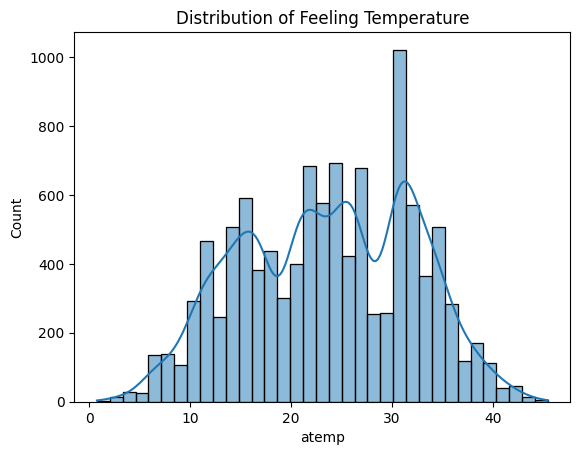

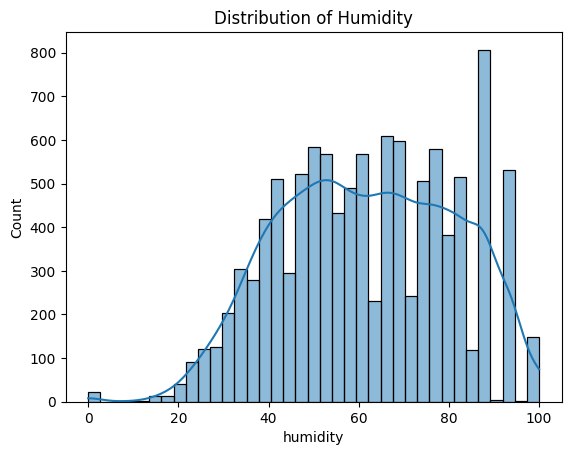

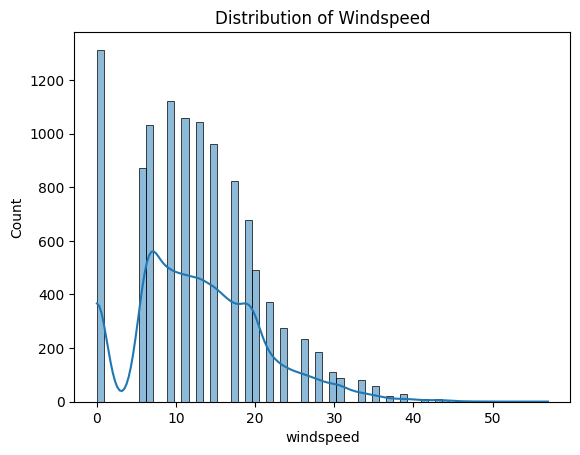

In [ ]:
# Continuous variables
sns.histplot(data['temp'], kde=True)
plt.title('Distribution of Temperature')
plt.show()

sns.histplot(data['atemp'], kde=True)
plt.title('Distribution of Feeling Temperature')
plt.show()

sns.histplot(data['humidity'], kde=True)
plt.title('Distribution of Humidity')
plt.show()

sns.histplot(data['windspeed'], kde=True)
plt.title('Distribution of Windspeed')
plt.show()

## **2.2 Bivariate Analysis**

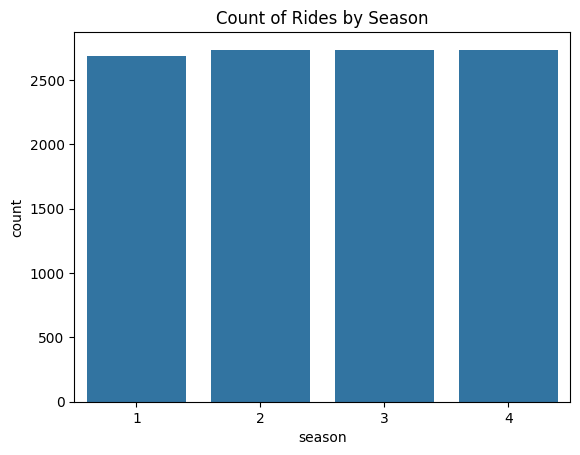

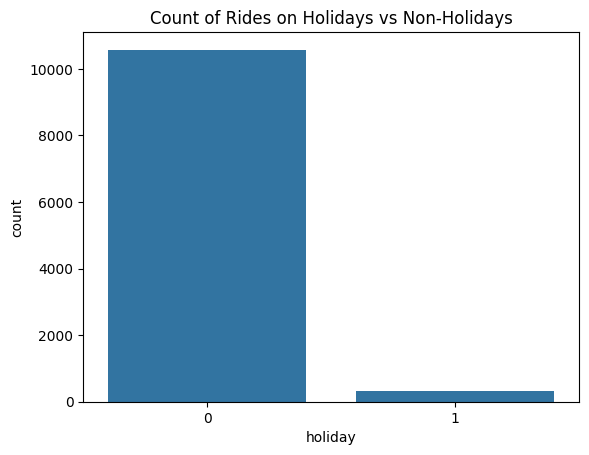

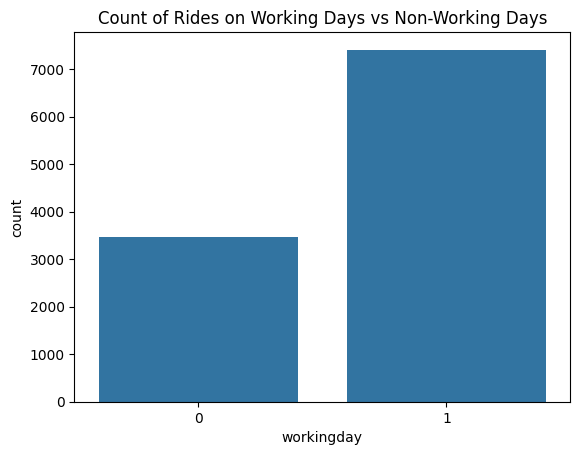

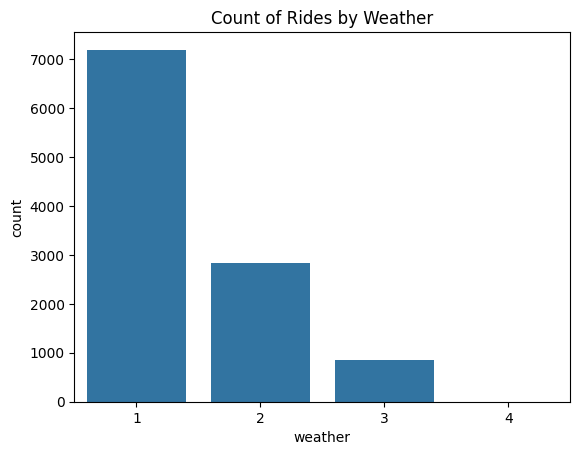

In [ ]:
# Categorical variables
sns.countplot(x='season', data=data)
plt.title('Count of Rides by Season')
plt.show()

sns.countplot(x='holiday', data=data)
plt.title('Count of Rides on Holidays vs Non-Holidays')
plt.show()

sns.countplot(x='workingday', data=data)
plt.title('Count of Rides on Working Days vs Non-Working Days')
plt.show()

sns.countplot(x='weather', data=data)
plt.title('Count of Rides by Weather')
plt.show()

# **3. Hypothesis Testing**

## **3.1 Effect of Working Day on Number of Electric Cycles Rented**

**Null Hypothesis (H0)**: Working day has no effect on the number of electric cycles rented.

**Alternative Hypothesis (H1)**: Working day has an effect on the number of electric cycles rented.

In [ ]:
workingday_count = data[data['workingday'] == 1]['count']
non_workingday_count = data[data['workingday'] == 0]['count']

# 2-sample t-test
t_stat, p_value = stats.ttest_ind(workingday_count, non_workingday_count)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 1.2096277376026694, P-value: 0.22644804226361348


### **🔍 Insights**

The p-value obtained from the 2-sample t-test is 0.2264, which is greater than the common significance level of 0.05. Therefore, we fail to reject the null hypothesis.

There is no statistically significant evidence to suggest that the number of electric cycles rented is different on working days compared to non-working days. This implies that, based on the data analyzed, working days do not have a significant impact on the demand for Yulu's shared electric cycles.

## **3.2 Effect of Season on Number of Electric Cycles Rented**

**Null Hypothesis (H0)**: Number of cycles rented is similar across different seasons.

**Alternative Hypothesis (H1)**: Number of cycles rented differs across different seasons.

In [ ]:
# Import necessary libraries
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

# ANOVA
# Use patsy's dmatrices to create design matrices with design info
y, X = dmatrices('count ~ season', data=data, return_type='dataframe')
# Use sm.OLS.from_formula to create the model, preserving design info
model = sm.OLS.from_formula('count ~ season', data=data).fit()  # Change this line
anova_result = sm.stats.anova_lm(model)
print(anova_result)

               df        sum_sq       mean_sq           F        PR(>F)
season        1.0  9.540914e+06  9.540914e+06  298.716206  4.758934e-66
Residual  10884.0  3.476320e+08  3.193973e+04         NaN           NaN


### **🔍 Insights**

The p-value obtained from the ANOVA test is 4.758934e-66, which is significantly lower than the common significance level of 0.05. Therefore, we reject the null hypothesis.


There is statistically significant evidence to suggest that the number of electric cycles rented differs across different seasons. This implies that the season has a considerable impact on the demand for Yulu's shared electric cycles. Yulu can leverage this insight to adjust their operations and marketing strategies according to seasonal variations, potentially enhancing demand and revenue during specific times of the year.

## **3.3 Effect of Weather on Number of Electric Cycles Rented**

**Null Hypothesis (H0)**: Number of cycles rented is similar across different weather conditions.

**Alternative Hypothesis (H1)**: Number of cycles rented differs across different weather conditions.

In [7]:
# ANOVA
model_weather = sm.OLS.from_formula('count ~ weather', data=data).fit()
anova_result_weather = sm.stats.anova_lm(model_weather)
print(anova_result_weather)

               df        sum_sq       mean_sq           F        PR(>F)
weather       1.0  5.911983e+06  5.911983e+06  183.185839  2.111106e-41
Residual  10884.0  3.512609e+08  3.227315e+04         NaN           NaN


### **🔍 Insights**

The p-value obtained from the ANOVA test is 2.111106e-41, which is significantly lower than the common significance level of 0.05. Therefore, we reject the null hypothesis.


There is statistically significant evidence to suggest that the number of electric cycles rented differs across different weather conditions. This indicates that weather has a significant impact on the demand for Yulu's shared electric cycles. Understanding how weather conditions affect usage can help Yulu optimize their fleet management and service availability, ensuring better preparedness and resource allocation during various weather scenarios to maximize user satisfaction and revenue.

## **3.4 Dependency of Weather on Season**

**Null Hypothesis (H0)**: Weather is independent of the season.

**Alternative Hypothesis (H1)**: Weather is dependent on the season.

In [8]:
contingency_table = pd.crosstab(data['season'], data['weather'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, P-value: {p}')

Chi2: 49.158655596893624, P-value: 1.549925073686492e-07


### **🔍 Insights**

The **p-value** obtained from the **Chi-square** test is **1.549925073686492e-07,** which is significantly lower than the common significance level of **0.05**. Therefore, we reject the **null hypothesis**.

There is statistically significant evidence to suggest that weather conditions are dependent on the season. This implies that certain weather conditions are more likely to occur during specific seasons. Understanding this dependency can help Yulu anticipate weather-related demand fluctuations and adjust their operational strategies accordingly. For example, Yulu can increase maintenance checks and availability of bikes in seasons known for more favorable weather, thereby enhancing service reliability and customer satisfaction.

# **4. Business Recommendations**

Based on the analysis of the various factors influencing the demand for Yulu's shared electric cycles, the following business recommendations can be made:

1. **Working Days:**
   - **Insight:** There is no significant difference in the number of electric cycles rented on working days compared to non-working days.
   - **Recommendation:** Yulu can maintain a consistent operational strategy throughout the week, without needing to differentiate between working and non-working days. However, targeted marketing campaigns on weekends or holidays may still attract more casual users.

2. **Seasonal Variations:**
   - **Insight:** The number of cycles rented varies significantly across different seasons.
   - **Recommendation:** Yulu should optimize resource allocation and marketing strategies according to seasonal demand. For instance, increase the availability of bikes and promotional activities during high-demand seasons (e.g., summer and spring) and consider offering special promotions or discounts during low-demand seasons (e.g., winter) to encourage usage.

3. **Weather Conditions:**
   - **Insight:** Weather conditions significantly impact the number of cycles rented.
   - **Recommendation:** Yulu should develop a dynamic operational plan that accounts for weather conditions. This could include increasing the number of bikes available on clear and favorable weather days and possibly reducing the fleet size during adverse weather conditions. Additionally, Yulu could provide weather-related updates and incentives (like discounts on rainy days) to encourage ridership despite less favorable conditions.

4. **Dependency of Weather on Season:**
   - **Insight:** Weather conditions are dependent on the season.
   - **Recommendation:** Given that certain weather conditions are more likely to occur during specific seasons, Yulu can use this information to better predict and plan for seasonal weather patterns. For example, they can prepare for increased bike maintenance during seasons with expected adverse weather and ensure adequate bike availability during seasons with more favorable weather conditions.

### Additional Recommendations:

- **User Engagement and Marketing:**
  - Implement targeted marketing campaigns based on user data and seasonal trends to increase user engagement and ridership.
  - Utilize data analytics to understand user preferences and behaviors, enabling more personalized marketing strategies.

- **Operational Efficiency:**
  - Enhance operational efficiency by using predictive analytics to manage bike distribution and maintenance schedules according to demand forecasts and weather predictions.
  - Consider partnerships with local businesses and community events to promote bike usage and increase visibility.

- **Technology and App Enhancements:**
  - Improve the user experience on the mobile app by providing real-time weather updates, route suggestions, and availability of bikes at nearby Yulu zones.
  - Implement loyalty programs and rewards for frequent users to boost retention and encourage regular usage.

- **Sustainability and Community Engagement:**
  - Promote Yulu's commitment to sustainability by highlighting the environmental benefits of using electric cycles.
  - Engage with local communities through awareness programs and events to foster a culture of sustainable commuting.

By implementing these recommendations, Yulu can enhance its service offerings, better meet user demands, and ultimately increase ridership and revenue.